# Homework 1
---
Kelcey Davis

Colaborators: Rachel, London, Bjorn

Estimated time to complete: 3 hours

In [1]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from matplotlib.patches import Ellipse
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

## Problem 1

Parallax is critically important for understanding stellar properties. But despite its simplicity (just
geometry!), most stars in the sky have been inaccessible to reliable parallax measurements - until
very recently. (8 pts total)

**a.** Can you reliably measure parallax to any stars with your eye? (2 pt)

The angular resolution for a human eye is one arcminute [1]. If we were able to use our eyes like a telescope, we could certainly measure paralax of any star with more than an arcminute or parallax. However, the star with the largest parallax, alpha centauri, has a parallax of $\approx$ 0.7 arcseconds[2]. Which corresponds to about 0.01 arcminutes. There are no stars whose parallax we could perceive with our eyes alone.

It is fun to point out that the Arecibo telescope, which was the largest single dish radio telescope before it's untimely death, also had a resolution of about an arcminute. When I talk to non-astronomers about my radio telescope work I like to point out that Arecibo resolves in radio about as well as your eye in optical. It can be a fun way to start conversations about the difficulties of radio telescope observing. 

Even more fun, it looks like astronomers have used Arecibo to compute parallax measurements [3]! Even though the resolution of the experiment was on the same order as our eyes, they were able to measure the parallax of a pulsar to about 3 marcsec. They experiment was certainly more complicated than a simple parallax measurement, but still cool to see. 


**b.** Galileo’s telescope had a 3 cm aperture. How many stars could he resolve parallax for? (2 pt)

We can approximate the angular resolution, $\theta$, as:

$\theta \approx1.22\frac{\lambda}{d}$

where $\lambda$ is the wavelength of light we are observing and d is the appeture diameter[1]. Galileo would be working with an angular resolution of 

$\theta_{Galileo} = 1.22 \frac{\lambda}{3x10^{-2}m}$

We will assume Galileo could look acorss the spectrum of visible light. The lowest wavelength he could detect was probably close to $0.4x10^{-6}$ m for the bluest light and $0.7x10^{-6}$ m for the reddest. For the bluest light, his angular resolution was:

$\theta_{Galileo} = 1.22 \frac{0.4x10^{-6} m}{3x10^{-2}m}$

In [165]:
theta_blue = 1.22*(0.4e-6)/(3e-2)
print(f'This is an angular resolution of {theta_blue:.5e} [rad].')

This is an angular resolution of 1.62667e-05 [rad].


For the reddest light, Galileo would have an angular resolution of:

$\theta_{Galileo} = 1.22 \frac{0.7x10^{-6} m}{3x10^{-2}m}$

In [167]:
theta_red = 1.22*(0.7e-6)/(3e-2)
print(f'This is an angular resolution of {theta_red:.5e} [rad].')

This is an angular resolution of 2.84667e-05 [rad].


We want this in arcseconds, not radians.

1 rad = 206265 arcsec

In [170]:
print(f'This is an angular resolution of {round(theta_blue*206265, 3)} arcseconds in blue.')

This is an angular resolution of 3.355 arcseconds in blue.


In [171]:
print(f'This is an angular resolution of {round(theta_red*206265, 3)} arcseconds in red.')

This is an angular resolution of 5.872 arcseconds in red.


The difference here is a small factor. We will go with the lower limit and assume that Gallileo had a resolution of about 3.4 arcseconds.

The closest star to us, Alpha Centauri, has a parallax of $\approx$ 0.7 arcseconds. [2] This means that there are **NO** stars in the sky the Galileo would have been able to measure parallax for on his 3cm telescope. :(

**c.** The Hipparcos satellite was a dedicated astrometry and parallax experiment that operated
from 1989-1993. It had an angular resolution of 1 mas (0.001 2 ). How many stars over the
entire sky could have parallax measured by Hipparcos with at least 10% precision? (Clearly
state your assumption about the density and distribution of stars around us.) (2 pts)

In [176]:
res_hipp = 1e-3#arcsec
pres = res_hipp*.1

print(f'The Hipparcos satellite could measure parallax up to {res_hipp:.1e}+/-{pres:.1e} [arcsec].')

The Hipparcos satellite could measure parallax up to 1.0e-03+/-1.0e-04 [arcsec].


We will make the approximation that the inverse of the parllax will give us the distance in parsecs.

In [178]:
dist = 1/res_hipp
print(f'This corresponds to a  maximum distance of {dist} [pc].')

This corresponds to a  maximum distance of 1000.0 [pc].


1,000 pc is well within the milky way. We will assume that the density of stars in the milky way is unifrom for simplicity. We will assume the average density of stars in the milky way is about 1. It feels like a good number. Alpha Centauri is close to about a parsec away and some areas are much more dense than ours. This is a very general approximation.


In [219]:
densities = 1

In [220]:
print(f'From this information, we will assume a density of {densities:.1e}  stars per 1000 square pc.')

From this information, we will assume a density of 1.0e+00  stars per 1000 square pc.


In [221]:
stars = densities * (1000*1000)
print(f'This corresponds to approximately {stars:.1e} observable from the Hipparcos telescope.')

This corresponds to approximately 1.0e+06 observable from the Hipparcos telescope.


d. Gaia launched in 2013 and achieves an astrometric precision of 7 μas (7 ˆ 10 ́62 ). It is still
operating, and had a major data release in April 2018. How many stars over the entire sky can
Gaia measure parallax with at least 10% precision? (Again, clearly state your assumptions.)
(2 pts)

In [222]:
res_gaia = 7e-6
pres_g = res_gaia*.1
print(f'Gaia has a resolution of {res_gaia} +/- {pres_g:.1e} [arcsec].')

Gaia has a resolution of 7e-06 +/- 7.0e-07 [arcsec].


In [223]:
p_gaia = 1/res_gaia
print(f'Gaia can resolve stars up to {p_gaia:.2e} pc away.')

Gaia can resolve stars up to 1.43e+05 pc away.


We could do soemthing more complicated like looking at how far this falls outside the local group, where this radius falls. Instead, I will make another arbitrary assumption. This region will not be as dense since we now need to account for the distance between galaxies. I will assume that the density falls off by around an order of magnitude and we will take the density as 0.1

In [225]:
densities = .1
stars = densities * (p_gaia**2)
print(f'We will assume that Gaia can observe approximately {stars:.1e} stars.')

We will assume that Gaia can observe approximately 2.0e+09 stars.


# Problem 2

Let’s use an H-R diagram to age-date two star clusters. Download the les cluster1.dat and
cluster2.dat from the course HuskyCT page. These are the pB  ́ V q colors and apparent V
magnitudes for stars in two open clusters in the Milky Way, compiled from the WEBDA database
(http://webda.physics.muni.cz). (8 pts total)

In [49]:
clust1 = pd.read_csv('cluster1.dat', sep = '     ', engine='python', names=['B-V', 'mv'])[1:]
clust2 = pd.read_csv('cluster2.dat', sep = '     ', engine='python', names=['B-V', 'mv'])[1:]
clust1['B-V'] = np.array(clust1['B-V'].values, dtype = float)
clust1['mv'] = np.array(clust1['mv'].values, dtype = float)
clust2['B-V'] = np.array(clust2['B-V'].values, dtype = float)
clust2['mv'] = np.array(clust2['mv'].values, dtype = float)

**a** Plot both in an H-R diagram of apparent V magnitude versus pB  ́ V q color, labeling your axes
and orienting the y-axis to be brightest at the top and faintest at the bottom. You can make
two separate H-R diagrams, or color-code each cluster and plot both in the same diagram. (4
pts)

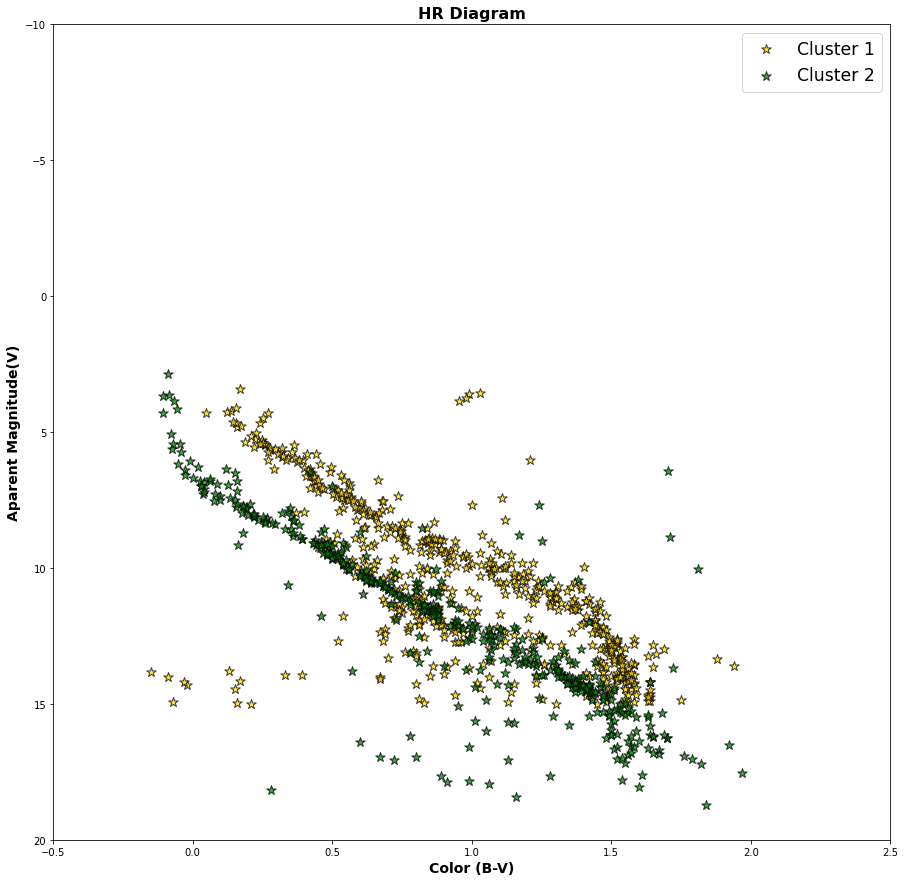

In [51]:
fig, ax = plt.subplots(figsize=(15, 15))


plt.scatter(clust1['B-V'], clust1['mv'], marker = '*', c = 'gold', edgecolor = 'k', s = 100,alpha = 0.75,
           zorder = 50, label = 'Cluster 1')

plt.scatter(clust2['B-V'], clust2['mv'], marker = '*', c = 'green', edgecolor = 'k', s = 100,alpha = 0.75,
           zorder = 50, label = 'Cluster 2')



plt.legend(loc = 'upper right', fontsize="xx-large");


plt.gca().invert_yaxis()

plt.xlim(-.5, 2.5)
plt.ylim(20, -10)

plt.xlabel('Color (B-V)')
plt.ylabel('Aparent Magnitude(V)')
plt.title('HR Diagram');

**b** What is the approximate age of each cluster? 

From our notes on age dating, we can get the approximate age of a cluster from the main sequence turn off. We age-date by finding the youngest main sequence star present.

-O/B stars: $\tau < 10^{7} years$

-A stars: $ 10^{7} years < \tau < 10^{8} years$

-F stars: $\tau \approx 10^{9} years$

-G stars: $\tau \approx 10^{10} years$

-K/M stars: $\tau > \tau_H$

We need to work with just the colors for this. We are given an aparent magnitude, so we cannot use the magnitudes to date the clusters. I will get the colors from StSci here: https://www.stsci.edu/~inr/intrins.html

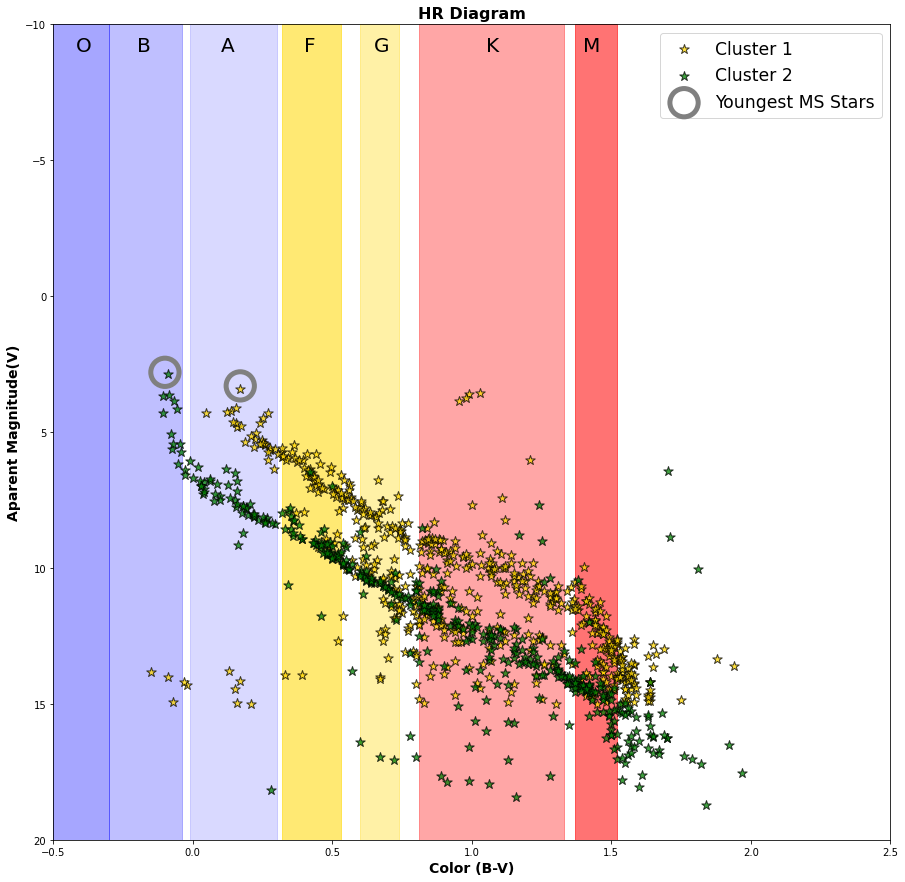

In [128]:
fig, ax = plt.subplots(figsize=(15, 15))

plt.axvspan(-0.5, -0.3, color = 'b', alpha = 0.35)
plt.text(-0.42, -9, 'O', fontsize = 20)

plt.axvspan(-0.3, -0.04, color = 'b', alpha = 0.25)
plt.text(-0.2, -9, 'B', fontsize = 20)

plt.axvspan(-0.01, 0.3, color = 'b', alpha = 0.15)
plt.text(0.10, -9, 'A', fontsize = 20)

plt.axvspan(0.32, 0.53, color = 'gold', alpha = 0.55)
plt.text(0.4, -9, 'F', fontsize = 20)

plt.axvspan(0.6, 0.74, color = 'gold', alpha = 0.35)
plt.text(0.65, -9, 'G', fontsize = 20)

plt.axvspan(0.81, 1.33, color = 'r', alpha = 0.35)
plt.text(1.05, -9, 'K', fontsize = 20)

plt.axvspan(1.37, 1.52, color = 'r', alpha = 0.55)
plt.text(1.4, -9, 'M', fontsize = 20)


plt.scatter(clust1['B-V'], clust1['mv'], marker = '*', c = 'gold', edgecolor = 'k', s = 100,alpha = 0.75,
           zorder = 50, label = 'Cluster 1')

plt.scatter(clust2['B-V'], clust2['mv'], marker = '*', c = 'green', edgecolor = 'k', s = 100,alpha = 0.75,
           zorder = 50, label = 'Cluster 2')

plt.scatter(-.1, 2.8, edgecolor = 'grey', facecolors='none', s = 800, lw = 5, zorder = 50,
           label = 'Youngest MS Stars')
plt.scatter(.17, 3.3, edgecolor = 'grey', facecolors='none', s = 800, lw = 5, zorder = 50)

plt.legend(fontsize="xx-large");


plt.gca().invert_yaxis()

plt.xlim(-.5, 2.5)
plt.ylim(20, -10)

plt.xlabel('Color (B-V)')
plt.ylabel('Aparent Magnitude(V)')
plt.title('HR Diagram');

We age date based on the YOUNGEST main sequence star present. For cluster 1, we see the tip of the main sequence where we expect to find the youngest stars falls in the "A" stellar classification. We can give cluster 1 an approximate age of:

$10^{7} < \tau_{1}  < 10^{8}$

Similarly for cluster 2, we find an that the youngest stars fall in the B stellar classification. We give cluster 2 an approximate age of:

 $\tau_{2} < 10^{7} years$



**c** The two clusters are offset on the y-axis. Why

We have been given **aparent** magnitudes. Not absolute magnitudes. Were we given absolute, this would be a true H-R diagram. Since we are not, things are off-centered. Since spectral type is strictly color dependent, we didn't have to worry about this with dating our clusters. However, it is causing the two clusters to be offset from each other. Another factor could be reddening due to dust attenuation.

**d** One of the clusters has a rather broad main sequence in the H-R diagram, almost like parallel
tracks. What’s going on here?

Cluster 1 (yellow) has a broad lower portion to it's main sequence. We know from our guessing that it is older than the other cluster. This broadening is stars leaving the main sequence. The stars above the main sequence (higher aparent magnitudes) are branching off and becoming giants. The stars below the main sequence (lower aparent magnitudes) are dead giants that have become white dwarfs. Because it is an older cluster, it has more of these older stars.

# Problem 3

An eclipsing binary star system has a period of 5 days. Two absorption-line components are observed
with maximum radial velocities of 50 km/s and 100 km/s. (4 pts total)

**a** What is the mass of each star? (2 pts)

In [134]:
P = 5*24*60*60#s
rad_v_max1 = 50 #km/s
rad_v_max2 = 100 #km/s
print(f'This is a period of {P:.1e} [s] and radial velocities of 50 [km/s] and 100 [km/s]')

This is a period of 4.3e+05 [s] and radial velocities of 50 [km/s] and 100 [km/s]


$\frac{M_1}{M_2} = \frac{v_2}{v_1}$

$\frac{M_1}{M_2} = \frac{100}{50} = 2$

$M_1 = 2 M_2$

We need a second equation to solve.

assuming an inclined orbit for simplicity,

$M_1 + M_2 = \frac{4 \pi^2}{G} \frac{a^3}{sin^3(i)} \frac{1}{P^2}$

using P for period:

$a = \frac{P}{2 \pi}(v_1 + v_2) = \frac{4.3x10^{5} [s]} {2 \pi}(150 [km/s]$

and assuming i = 90 [deg]

In [139]:
a = P*150/(2*np.pi)
print(f'a = {a:.2e} [km]')

a = 1.03e+07 [km]


$M_1 + M_2 = \frac{4 \pi^2}{G}\frac{(1.03x10^{7}[km])^3}{1^3} \frac{1}{(4.3x10^{5}[s])^2}$

In [151]:
frac = (a**3) / (P**2)
G = c.G.to(u.km**3/(u.kg*u.s**2))
print(f'The right two fractions simplify to {frac:.1e} [km^3 / s^2]. The constant G is {G}')

The right two fractions simplify to 5.9e+09 [km^3 / s^2]. The constant G is 6.6743e-20 km3 / (kg s2)


In [152]:
G

<Quantity 6.6743e-20 km3 / (kg s2)>

$M_1 + M_2 = 2M_2 + M_2 = 3M_2$

$3 M_2 = 4 \pi^2 \frac{1}{6.6743 x 10^{-20} [\frac{km^3}{kg s^2}]} 5.9x10^9 [\frac{km^3}{s^2}]$


In [161]:
threeM2 = 4*(np.pi**2)*(frac/G.value)
m2 = threeM2/3
print(f'This leavse us with 3M2 = {threeM2:.1e}[kg].\nM2 = {m2:.1e} [kg].')

This leavse us with 3M2 = 3.5e+30[kg].
M2 = 1.2e+30 [kg].


From our first formula:

$M_1 = 2M_2$

$\therefore$

In [162]:
m1 = m2/2
print(f'M1 = {m1:.1e} [kg].')

M1 = 5.8e+29 [kg].


**b**The fast star is smaller, and takes 2 hr to go from rst contact to minimum in the lightcurve.
Totality of the eclipse lasts for 10 hr. What is the size of each star? Which one is on the main
sequence? (2

$t_2 - t_1 = 2 hours = 7200 s$

$t_3 - t_1 - 10 hours = 36000 s$


$R_2 = \frac{v}{2} (t_3 - t_1)$

$R_1  = \frac{v}{2} (t_2 - t_1)$

$v = |v_1| + |v_2|$

$v = 150 [\frac{km}{s}]$

$\frac{v}{2} = 75 [\frac{km}{s}]$

$R_2 =  75 [\frac{km}{s}] (36000 s)$

$R_1  =  75 [\frac{km}{s}] (7200 s)$


In [234]:
r1 = 2*60*60*75
r2 = 10*60*60*75
print(f'The radii are R1 = {r1:.2e} [km] and R2 = {r2:.2e} [km].')

The radii are R1 = 5.40e+05 [km] and R2 = 2.70e+06 [km].


The smaller $R_1$ star is the main sequence star.

# Problem 4

Make an H-R diagram of the 314 brightest stars in the sky (limited by apparent magnitude m V ă
3.55), drawn from the le hr neareststars.dat. (You’ll note that the columns represent B  ́ V
and M V .) Is this set representative of where most stars live on the H-R diagram? In other words,
are any kinds of stars over- or under-represented in a sample limited by apparent brightness? (5
pts)

I'll try to make an HR diagram that looks something like the one from wikipedia so we can easily compare them [5].

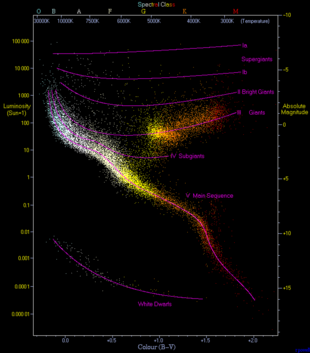



In [41]:
#pandas is trying to load this in a little strange, just rearanging some things.
bv = pd.read_table('hr_neareststars.dat', sep="\s+")['%%']
mv = pd.read_table('hr_neareststars.dat', sep="\s+")['B-V']
df = pd.DataFrame({'B-V':bv, 'Mv':mv})
df

,B-V,Mv
0,0.63,4.82
1,-0.11,-0.40
2,0.34,2.00
3,-0.23,-3.10
4,0.62,3.80
...,...,...
309,0.05,1.20
310,0.09,2.00
311,1.67,-2.00
312,-0.04,0.10


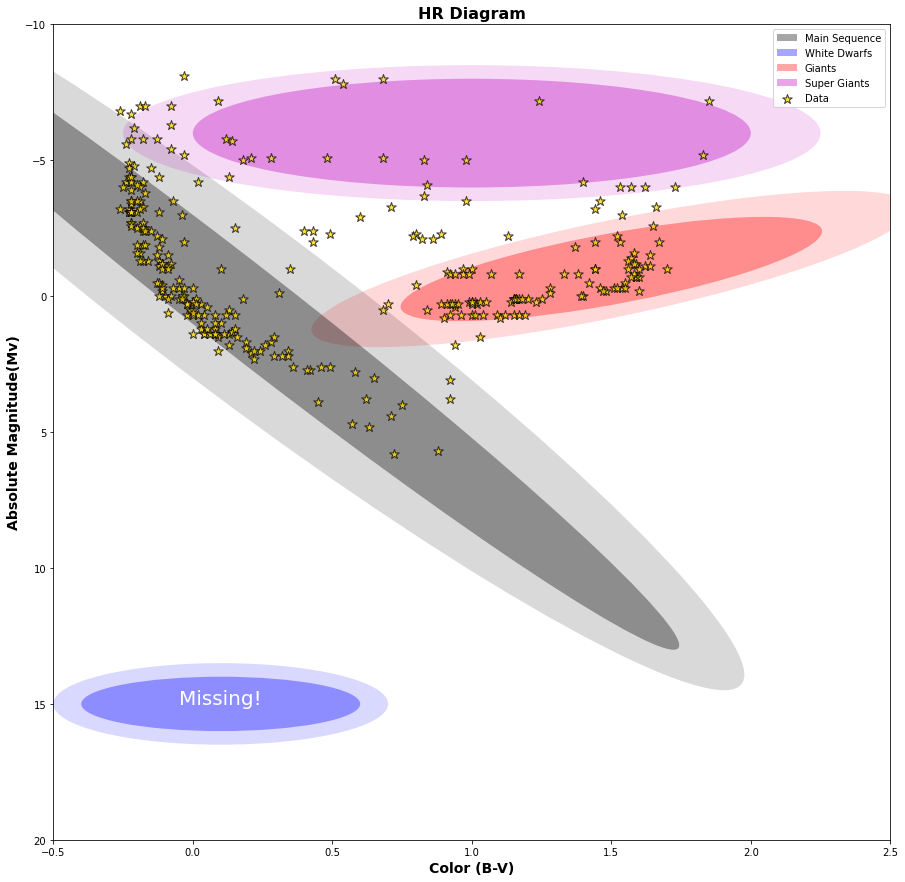

In [42]:
fig, ax = plt.subplots(figsize=(15, 15))


plt.scatter(df['B-V'], df['Mv'], marker = '*', c = 'gold', edgecolor = 'k', s = 100,alpha = 0.75,
           zorder = 50, label = 'Data')

elips1 = Ellipse((0.2, 0.6), 25, .5,angle=83, 
                linewidth=0, fill=True, zorder=1, label = 'Main Sequence',  alpha = 0.35, color = 'k')
elips2 = Ellipse((0.2, 0.6), 28, 1,angle=83, 
                linewidth=0, fill=True, zorder=0,  alpha = 0.15, color = 'k')

elips3 = Ellipse((0.1, 15), 2, 1,angle=90, 
                linewidth=0, fill=True, zorder=0,  alpha = 0.35, color = 'b', label = 'White Dwarfs')

elips4 = Ellipse((0.1, 15), 3, 1.2,angle=90, 
                linewidth=0, fill=True, zorder=0,  alpha = 0.15, color = 'b')

elips5 = Ellipse((1.5, -1), 4, 1,angle=-73, 
                linewidth=0, fill=True, zorder=0,  alpha = 0.35, color = 'r', label = 'Giants')
elips6 = Ellipse((1.5, -1), 6, 1.3,angle=-73, 
                linewidth=0, fill=True, zorder=0,  alpha = 0.15, color = 'r')

elips7 = Ellipse((1, -6), 2, 4,angle=0, 
                linewidth=0, fill=True, zorder=0,  alpha = 0.35, color = 'm', label = 'Super Giants')
elips8 = Ellipse((1, -6), 2.5, 5,angle=0, 
                linewidth=0, fill=True, zorder=0,  alpha = 0.15, color = 'm')

plt.text(-0.05,15,'Missing!', c= 'white', fontsize = 20)

ax.add_patch(elips1)
ax.add_patch(elips2)
ax.add_patch(elips3)
ax.add_patch(elips4)
ax.add_patch(elips5)
ax.add_patch(elips6)
ax.add_patch(elips7)
ax.add_patch(elips8)

plt.legend(loc = 'upper right');


plt.gca().invert_yaxis()
plt.xlim(-.5, 2.5)
plt.ylim(20, -10)
plt.xlabel('Color (B-V)')
plt.ylabel('Absolute Magnitude(Mv)')
plt.title('HR Diagram');

This is a very cartoony version of an HR diagram, but it helps us interpret what is going on. We will use it to answer our question:

**Is this set representative of where most stars live on the H-R diagram?**

This set is representative of where many stars live on the H-R diagram. We see a clear main sequence branch with red giants branching off. We also see some further evolved super giants. However, we are clearly missing white dwarfs! They are very underrepresented here. Comparing to the diagram from wikipedia, the other categories seem to be farily well represented. 

The stars on the maine sequence are abundant towards the bluer, more luminous, end of the main sequence branch. However, they drop off towards the redder, less luminous portion of the diagram. This may mean that we are missing out on representing these stars.

Because we are missing some of these less luminous objects from the magnitude cutoff, this may mean that our giants are a bit over-represented. However, we would expect to see more giants than super giants so this ratio may be correct.

References

1. https://plus.maths.org/content/what-can-we-see
2. https://www.astronomy.ohio-state.edu/thompson.1847/1144/Lecture5.html
3. https://arxiv.org/abs/astro-ph/0601521
4. https://www.nrcan.gc.ca/maps-tools-publications/satellite-imagery-air-photos/remote-sensing-tutorials/introduction/electromagnetic-spectrum/14623
5. https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram
6. https://www.britannica.com/place/Milky-Way-Galaxy/Star-populations-and-movement